<a href="https://colab.research.google.com/github/taneshkaa/Supermarket-Sales-Analysis/blob/main/Supermarket_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supermart Sales Analytics**

Sales Analysis [Revenue Generation, Popular Branch, Gross Margin Percentage, Rating, Gross Income, etc] on Supermarket Dataset. This Dataset contain 3 Months Historical Sales Data of Supermarket.

Dataset Link -: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales




## Import Libraries

In [ ]:
#Importing required Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving supermarket_sales.csv to supermarket_sales.csv


In [ ]:
df = pd.read_csv('supermarket_sales.csv')

## Task 1: Initial Data Exploration

In [ ]:
df.info

<bound method DataFrame.info of        Invoice ID Branch       City Customer type  Gender  \
0     750-67-8428      A     Yangon        Member  Female   
1     226-31-3081      C  Naypyitaw        Normal  Female   
2     631-41-3108      A     Yangon        Normal    Male   
3     123-19-1176      A     Yangon        Member    Male   
4     373-73-7910      A     Yangon        Normal    Male   
...           ...    ...        ...           ...     ...   
998   347-56-2442      A     Yangon        Normal    Male   
999   849-09-3807      A     Yangon        Member  Female   
1000  849-09-3807      A     Yangon        Member  Female   
1001  745-74-0715      A     Yangon        Normal    Male   
1002  452-04-8808      B   Mandalay        Normal    Male   

                Product line  Unit price  Quantity   Tax 5%     Total  \
0          Health and beauty       74.69       7.0  26.1415  548.9715   
1     Electronic accessories       15.28       5.0   3.8200   80.2200   
2         Home a

Detailed Description of the Dataset-:

**Invoice ID** - Computer generated sales Invoice ID

**Branch** - Branch of the Supermarket [3 Branches identified - A,B,C]

**City** - Location of the Supermarket

**Customer Type** - Type of Customer [Member of the Supermarket (regular), Normal]

**Gender** - Gender Type of the Customer [In the Loaded Dataset - m/f]

**Product Line** - Different Categories for Products [Fashion Accessories, Sports and Travel, etc.]

**Unit Price** - Price of each unit in $

**Quantity** - Number of Product Purchase by Customer

**Tax 5%** - 5% Tax for Customer Buying

**Total** - Total Price including Tax 

**Date** - Date of Purchase [from January 2019 to March 2019]

**Time** - Purchase Timimg [10:00AM-9:00PM] 

**Payment** - Payment Type used by Customers at the time of Purchase [3 Types: EWallet, Cash, Credit Card]

**COGS** - Cost of Good Sold


**Gross Margin Percentage** - Gross Margin Percentage

**Gross Income** - Income of Supermarket

**Rating** - Customer's Overall Shopping Experince from 1 to 10 [1 being lowest and 10 being higest]


In [ ]:
#Size of the Dataset 
df.shape

(1003, 17)

In [ ]:
#Column Names
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#Number of unique values in each column
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  938
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [ ]:
#Printing first 5 rows of the Dataset
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Printing first 20 rows of the Dataset
df.head(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/19,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,NaN,68.84,6.0,20.6520,433.6920,2/25/19,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,NaN,73.56,10.0,36.7800,772.3800,2/24/19,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,NaN,36.26,2.0,3.6260,76.1460,1/10/19,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,NaN,54.84,3.0,8.2260,172.7460,2/20/19,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [ ]:
#Printing last 5 rows of the Dataset
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291,69.111,2/22/19,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1000,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,2/18/19,13:28,Cash,618.38,4.761905,30.919,6.6
1001,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,3/10/19,20:46,Ewallet,116.06,4.761905,5.803,8.8
1002,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,1/26/19,15:17,Cash,609.56,4.761905,30.478,5.5


In [ ]:
#Printing last 20 rows of the Dataset
df.tail(20)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7.0,34.9860,734.7060,1/23/19,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7.0,33.7295,708.3195,1/9/19,11:40,Cash,674.59,4.761905,33.7295,6.0
985,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,63.71,5.0,15.9275,334.4775,2/7/19,19:30,Ewallet,318.55,4.761905,15.9275,8.5
986,764-44-8999,B,Mandalay,Normal,Female,Health and beauty,14.76,2.0,1.4760,30.9960,2/18/19,14:42,Ewallet,29.52,4.761905,1.4760,4.3
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8.0,24.8000,520.8000,1/3/19,19:08,Credit card,496.00,4.761905,24.8000,6.2
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10.0,41.1700,864.5700,3/29/19,19:12,Ewallet,823.40,4.761905,41.1700,4.3
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8.0,30.1480,633.1080,1/28/19,15:46,Credit card,602.96,4.761905,30.1480,8.4
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5.0,14.1400,296.9400,3/22/19,19:06,Credit card,282.80,4.761905,14.1400,4.5
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10.0,38.3000,804.3000,1/24/19,18:10,Ewallet,766.00,4.761905,38.3000,6.0
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.8030,121.8630,3/10/19,20:46,Ewallet,116.06,4.761905,5.8030,8.8


In [ ]:
#Statistical Operations on Loaded Dataset
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## Task 3: Dealing with Duplicate Rows and Missing Values

In [ ]:
# Checking for duplicate values (if any)
df.duplicated().sum()

3

In [ ]:
# Droping the duplicates (if any)
df.drop_duplicates()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,NaN,1.0,2.0175,42.3675,1/29/19,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,NaN,10.0,48.6900,1022.4900,3/2/19,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,NaN,1.0,1.5920,33.4320,2/9/19,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.2910,69.1110,2/22/19,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
# Checking for missing data (if any)
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Invoice ID - 0%
Branch - 0%
City - 0%
Customer type - 8%
Gender - 0%
Product line - 4%
Unit price - 1%
Quantity - 2%
Tax 5% - 0%
Total - 0%
Date - 0%
Time - 0%
Payment - 0%
cogs - 0%
gross margin percentage - 0%
gross income - 0%
Rating - 0%


## Task 2: Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


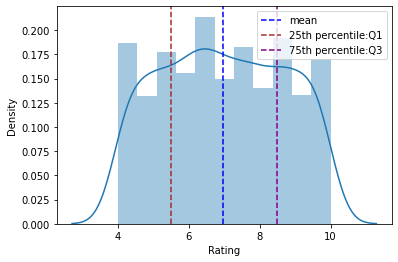

In [ ]:
#Visuals for Single Attribute - Rating
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='blue', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='brown', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='purple', ls='--',label = '75th percentile:Q3' )
plt.legend()

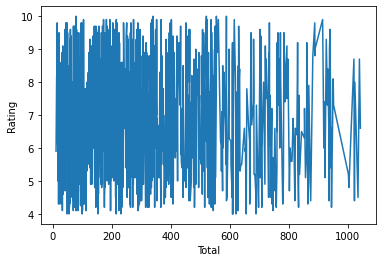

In [ ]:
#Visuals for Attribute - Rating
rate = sns.lineplot(x="Total", y = "Rating", data =df)

**Question 1**: What does the distribution of customer ratings looks like? Is it skewed?

In [ ]:
#Through above analysis, there is quite uniformity in the Customer's Rating. 
#According to the Visulas - Mean Rating is around 7, 
#So, Customer's Rating is mostly symmetrical and little unsymmetrical. 
#It can be concluded that Customer's Rating is Not Prejudiced [Not Skewed].

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


A    342
B    333
C    328
Name: Branch, dtype: int64

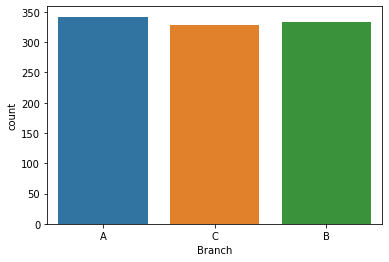

In [ ]:
#Visuals for Single Vriable - Branch
sns.countplot(df['Branch'])
df['Branch'].value_counts()

**Question 2**: Do aggregate sales numbers differ by much between branches?

In [ ]:
#Through the above analysis, Branch A, B & C have kind of similar sales chart aggregation,
#And Branch A has slightly high sales aggregation as compared to Branch B & C.

## Dataset Analysis and Visualization

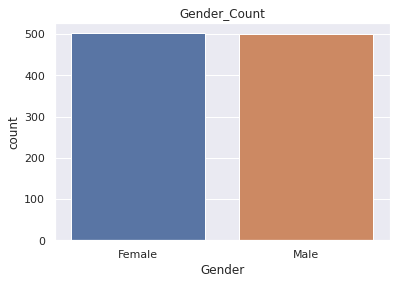

In [ ]:
#Visualization for Attribute - Gender
sns.set(style="darkgrid")       
genderCount  = sns.countplot(x="Gender", data =df).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

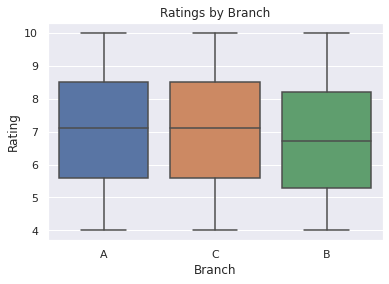

In [ ]:
#Visuals for Attribute - Branch and Ratings
sns.boxplot(x="Branch", y = "Rating" ,data =df).set_title("Ratings by Branch") 

In [ ]:
#Through above analysis Branch B has lowest Ratings compared to Branch A & C

In [ ]:
df['date'] = pd.to_datetime(df['Date'])
df['date'].dtype

dtype('<M8[ns]')

In [ ]:
type(df['date'])

pandas.core.series.Series

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])

df['Hour'] = (df['Time']).dt.hour 

In [ ]:
#Prints unique number of Hours
df['Hour'].nunique() 

11

In [ ]:
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.0,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682,15.264207,1.993021,2019.0,14.913260
std,26.510165,2.924673,11.715192,246.019028,234.303836,8.886215e-16,11.715192,1.717647,8.689188,0.835198,0.0,3.186714
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000,1.000000,1.000000,2019.0,10.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000,8.000000,1.000000,2019.0,12.000000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000,15.000000,2.000000,2019.0,15.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000,31.000000,3.000000,2019.0,20.000000


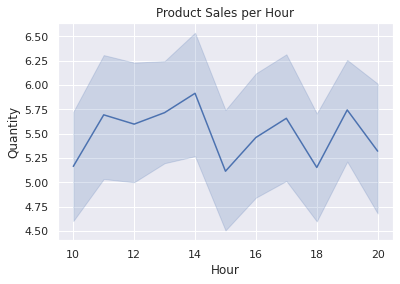

In [ ]:
#Visuals for Attribute - Hours/Quantity
ps  = sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

In [ ]:
#The above analysis show maximum sales at Hours - 14:00

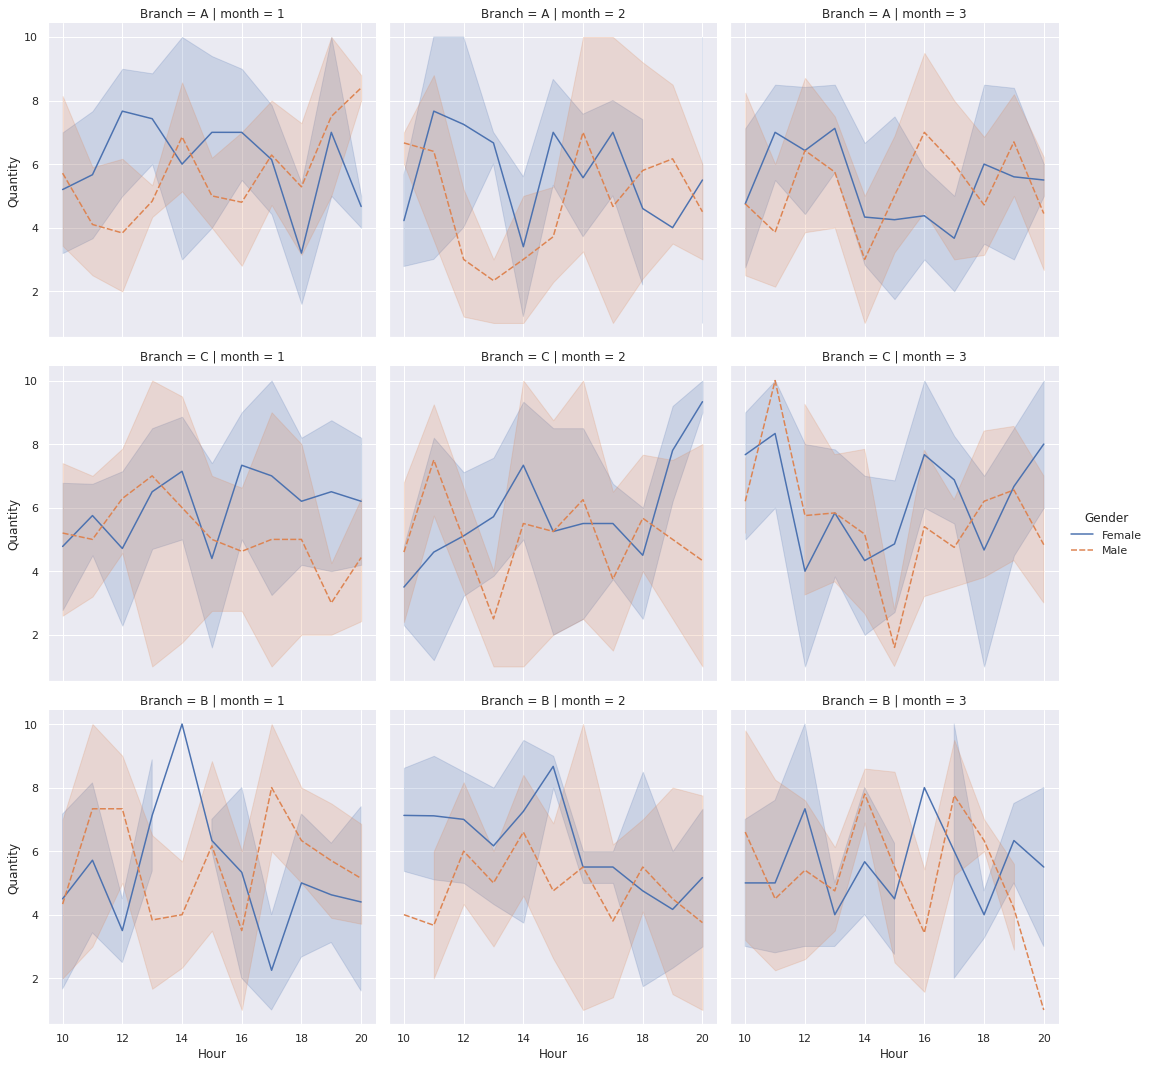

In [ ]:
#Visuals for Attribute - Branch Sales Quantity/Hour in Monthly Fashion
ps  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)

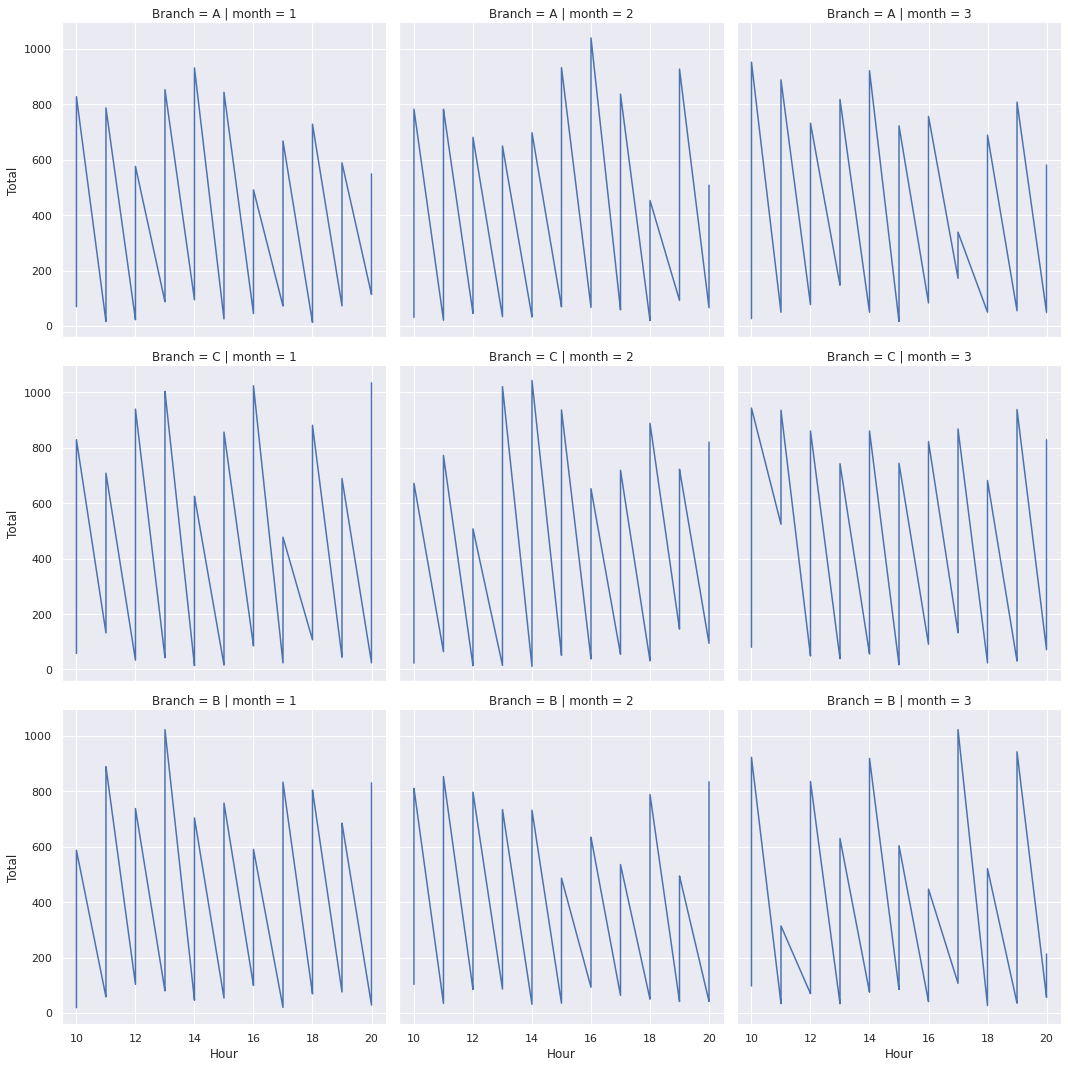

In [ ]:
#Visuals for Attribute - Branch Sales/Hour in Monthly Fashion
ps  = sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df)

In [ ]:
#Unique Rating Values
df['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

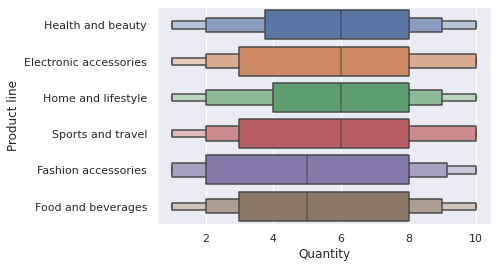

In [ ]:
#Visuals for Attribute - Product Type
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df)

In [ ]:
#Through the above analysis, Health and Beauty,Electronic accessories, 
#Home and lifestyle, Sports and travel have a better average quantity sales than,
#Food and beverages as well as Fashion accessories

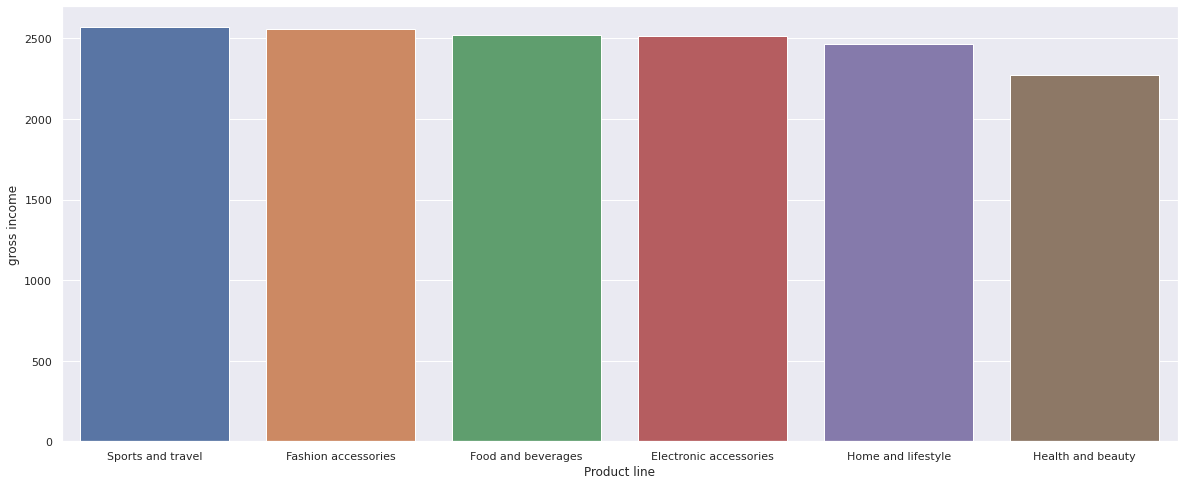

In [ ]:
#Visuals for Products generating Income
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

In [ ]:
#Through the above analysis, Sports and travel, Fashion accessories -
#generates bettwer income than other product line

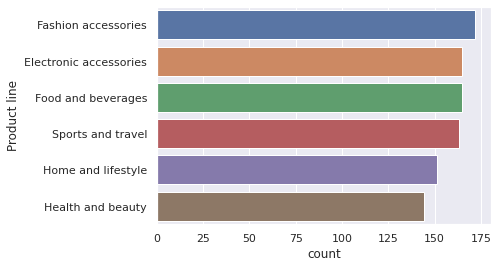

In [ ]:
#Visulas for Attribute - Product Line
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

In [ ]:
#Through above analysis, Fashion Accessories is the highest product type sold 
#while, Health and beauty is the lowest

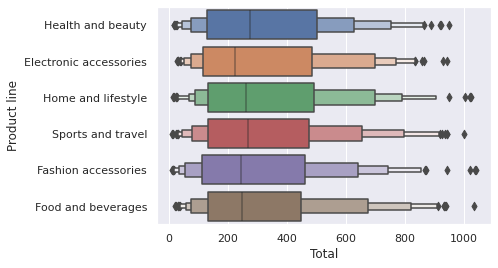

In [ ]:
#Visuals for Product Line by Total
sns.boxenplot(y = 'Product line', x = 'Total', data=df)

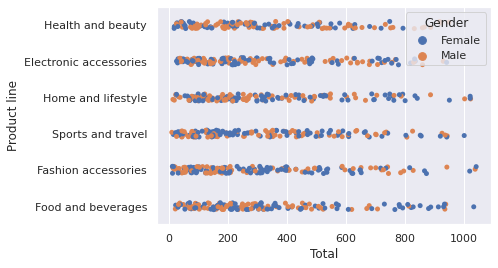

In [ ]:
#Visuals for Product Line by Total based on Gender
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=df)

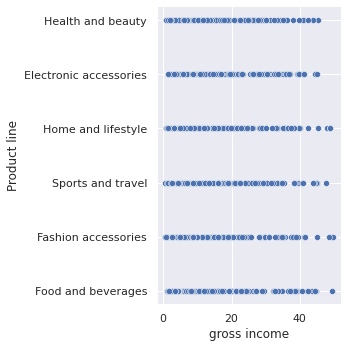

In [ ]:
#Visulas for Product Line by Gross Income
sns.relplot(y = 'Product line', x = 'gross income', data=df)

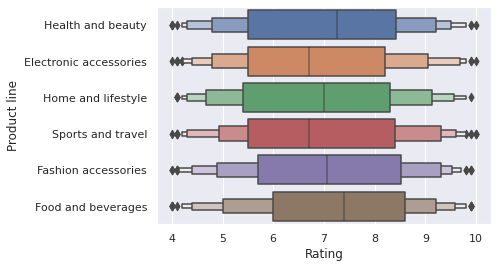

In [ ]:
#Visuals of Product Line by Rating
sns.boxenplot(y = 'Product line', x = 'Rating', data=df)

In [ ]:
#Through the above analysis, Food and beverages have Highest Average Rating
#while Sports and Travel the Lowest

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


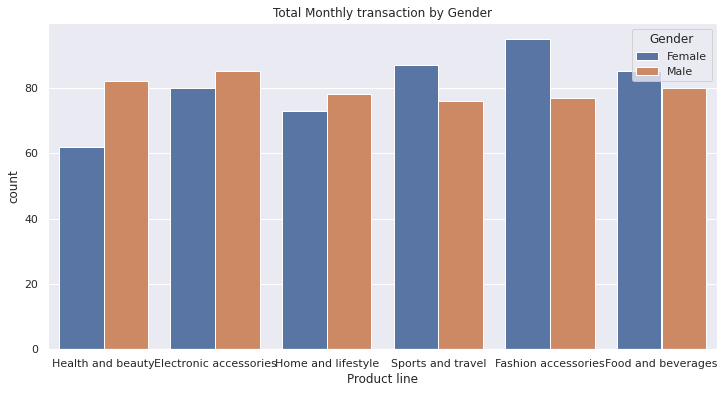

In [ ]:
#Visuals for Male/Female spending Patterns
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Product line'], hue = df.Gender)

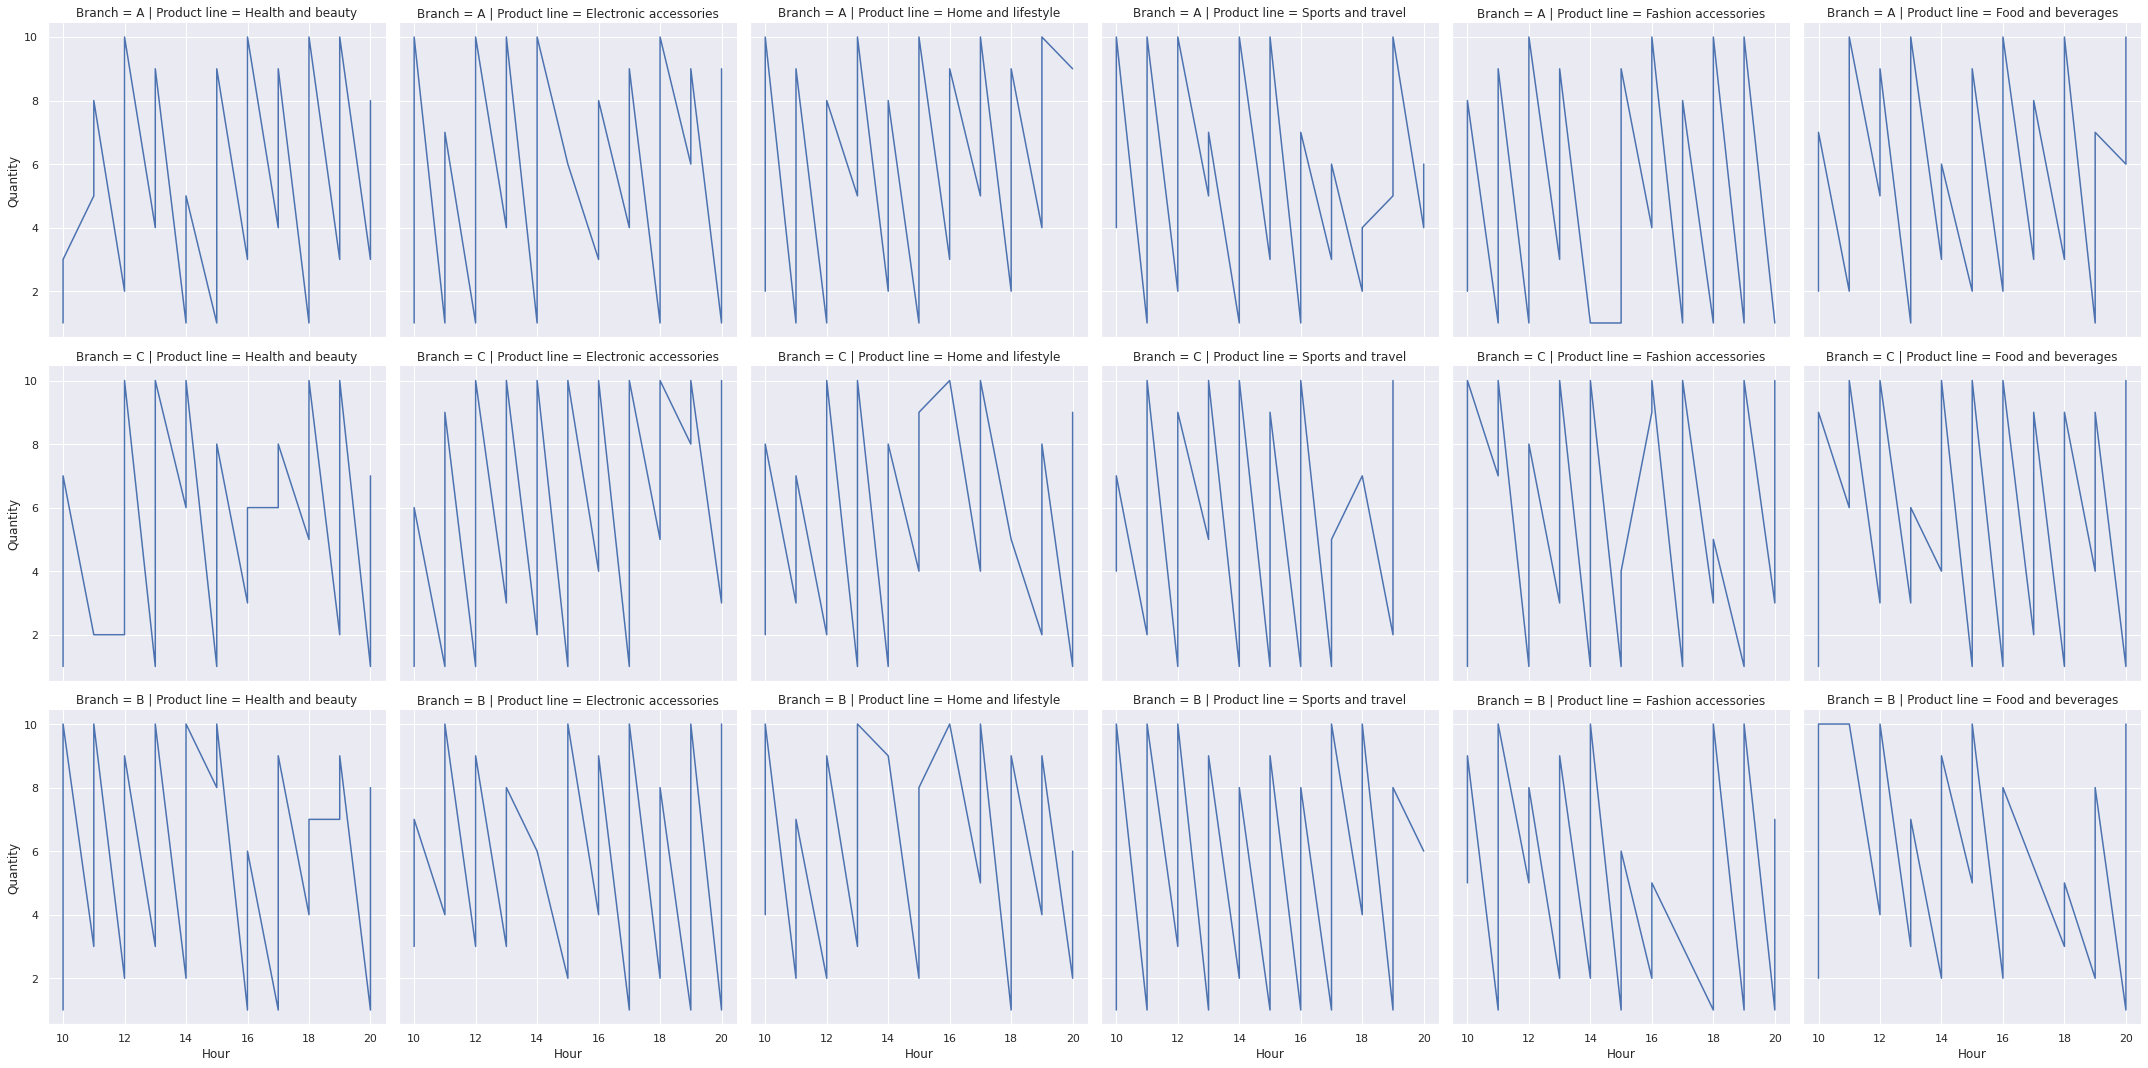

In [ ]:
#Visulas of Customer's Purchasing certain Product from different Branches
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =df)

In [ ]:
#Through above analysis, Food and beverages Sales are Highest in all 3 Branches, especially in Evenings.

Text(0.5, 1.0, 'Payment Channel')

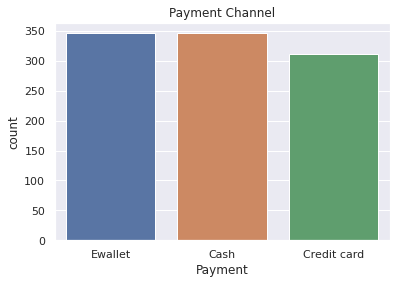

In [ ]:
#Visulas for Attribute - Payment 
sns.countplot(x="Payment", data =df).set_title("Payment Channel") 

In [ ]:
#Through above analysis, most of the Customers use - EWallet & Cash as Payment Method,
#while under 40% of the customers uses Credit Crd as Payment Method.

Text(0.5, 1.0, 'Payment Channel by Branch')

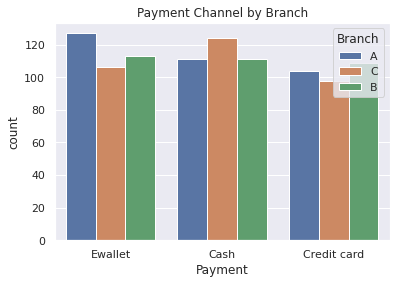

In [ ]:
#Visuals of Attribute - Payment Type Distributions in different Branches
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch")

In [ ]:
#Types of customers
df['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

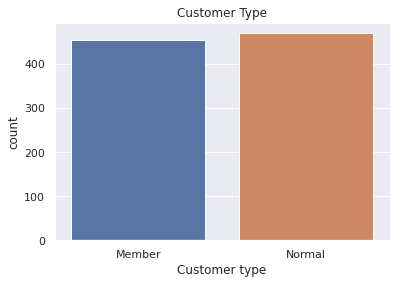

In [ ]:
#Visuals for Attribute - Customer Type
sns.countplot(x="Customer type", data =df).set_title("Customer Type")

Text(0.5, 1.0, 'Customer Type by Branch')

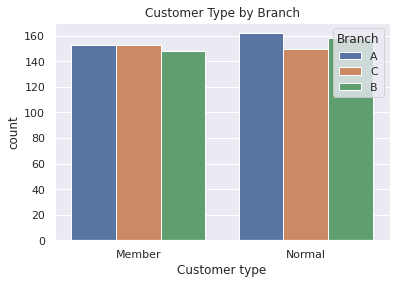

In [ ]:
#Visuals of Customer Type by Branch
sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch") 

In [ ]:
#Customer Type and Sales Influence
df.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,150853.8255
Normal,150889.8300


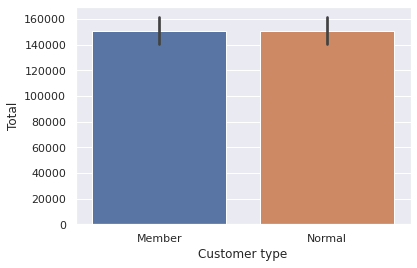

In [ ]:
#Visuals for Customer Type and Total Amount
sns.barplot(x="Customer type", y="Total", estimator = sum, data=df)

Text(0.5, 1.0, 'Customer Type')

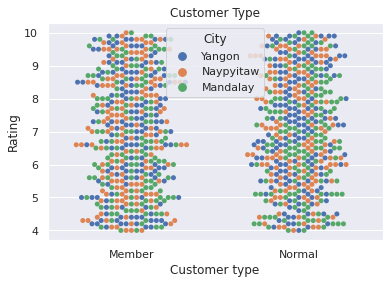

In [ ]:
#Visuals for Customer Type and Rating in different Cities
sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =df).set_title("Customer Type") 

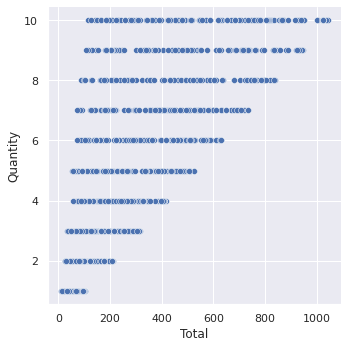

In [ ]:
#Visuals of Quantity with Total Amount
sns.relplot(x="Total",  y = "Quantity", data =df)